In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

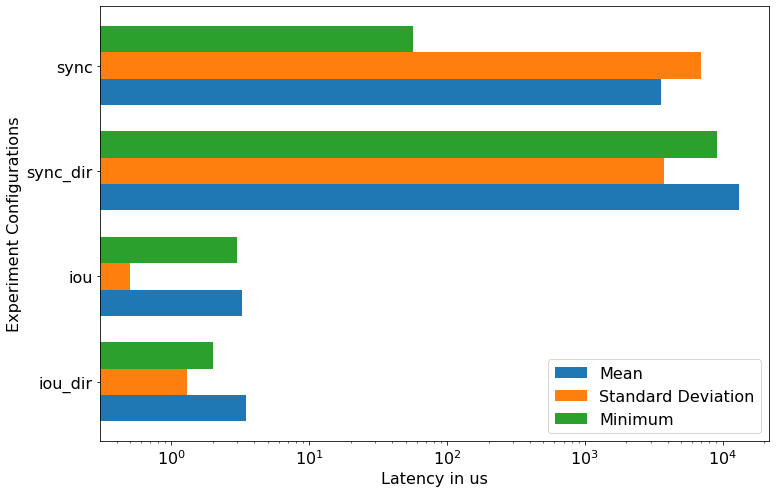

In [102]:
directory = "../report/"

# Initialize empty lists to store statistics
means = []
stds = []
mins = []
bar_labels = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('latency'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        minimum = df.min().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        mins.append(minimum)
        new_label = filename[:-4]
        new_label = new_label.replace("latency_", "")
        new_label = new_label.replace("io_uring", "iou")
        new_label = new_label.replace("direct", "dir")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x - width, means, width, label='Mean')
rects2 = ax.barh(x, stds, width, label='Standard Deviation')
rects3 = ax.barh(x + width, mins, width, label='Minimum')

# Add labels to the bars
ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=16)

ax.set_xlabel('Latency in us', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


ax.set_xscale('log')
plt.savefig('../report/latency.png')
plt.show()


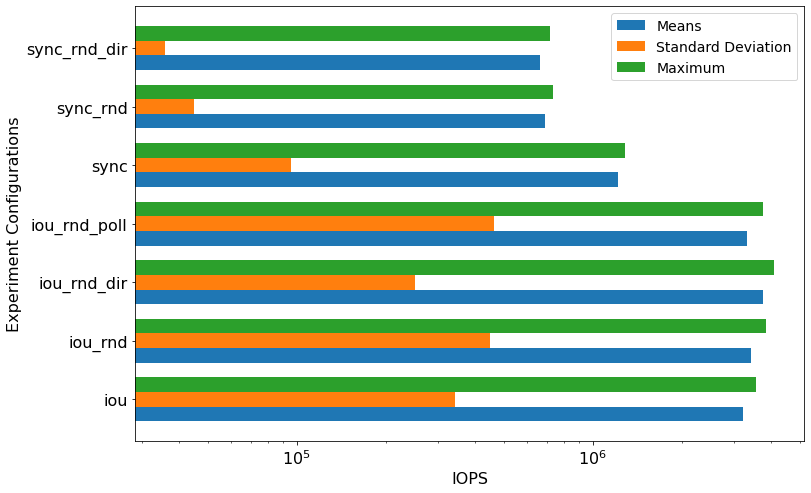

In [101]:
means = []
stds = []
maxs = []
bar_labels = []
# Loop through each file in the directory
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and filename.startswith('iops'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        maximum = df.max().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        maxs.append(maximum)
        new_label = filename[:-4]
        new_label = new_label.replace("iops_", "")
        new_label = new_label.replace("io_uring", "iou")
        new_label = new_label.replace("random", "rnd")
        new_label = new_label.replace("direct", "dir")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x - width, means, width, label='Means')
rects2 = ax.barh(x, stds, width, label='Standard Deviation')
rects3 = ax.barh(x + width, maxs, width, label='Maximum')

ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=14)

ax.set_xscale('log')
ax.set_xlabel('IOPS', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.savefig('../report/iops.png')
plt.show()

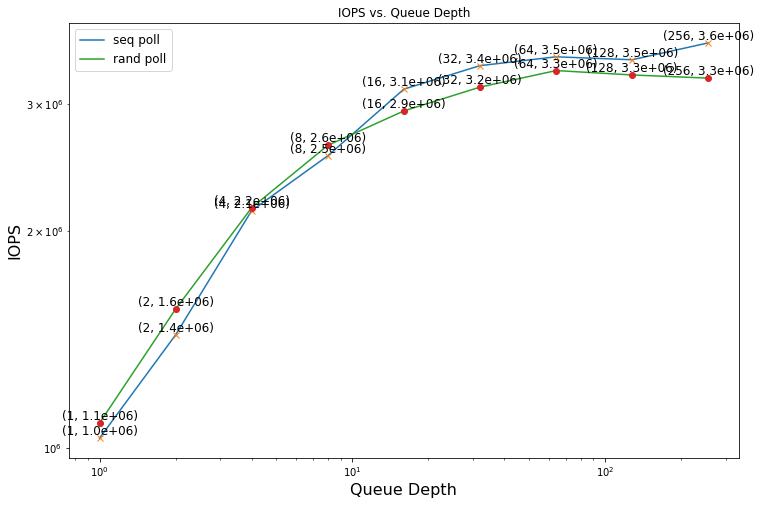

In [104]:
from matplotlib.ticker import ScalarFormatter

means = []
rnd_means = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('qd_'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]

        new_label = filename[:-4]
        new_label = new_label.replace("qd_", "")
        if(new_label.startswith("rnd_")):
          new_label = new_label.replace("rnd_", "")
          qd = int(new_label)
          rnd_means.append((qd, mean))
        else:
          qd = int(new_label)
          # Append the statistics to the respective lists
          means.append((qd, mean))


#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])
rnd_means.sort(key=lambda x: x[0])

# Extract the sorted parameters and means
parameters, means = zip(*means)
parameters, rnd_means = zip(*rnd_means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, means, label="seq poll")
plt.plot(parameters, means, 'x')
plt.plot(parameters, rnd_means, label='rand poll')
plt.plot(parameters, rnd_means, 'o')


plt.xlabel('Queue Depth', fontsize=16)
plt.ylabel('IOPS', fontsize=16)

plt.xscale('log')
plt.yscale('log')
plt.title('IOPS vs. Queue Depth')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
for parameter, mean in zip(parameters, means):
    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)

# Add labels to the data points
for parameter, mean in zip(parameters, rnd_means):
    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)

plt.legend(fontsize=12)

plt.savefig('../report/queue_depth.png')
plt.show()

[(1, array([0.4225  , 1.1     , 1.532947])), (2, array([0.425   , 1.14    , 1.570425])), (4, array([0.405     , 1.1625    , 1.57920125])), (8, array([0.435   , 1.1325  , 1.578652])), (16, array([0.42    , 1.1075  , 1.537516])), (32, array([0.3825  , 1.135   , 1.526478])), (64, array([0.4075    , 1.1175    , 1.53471975])), (128, array([0.4225   , 1.105    , 1.5379515])), (256, array([0.4425  , 1.1     , 1.550508]))]


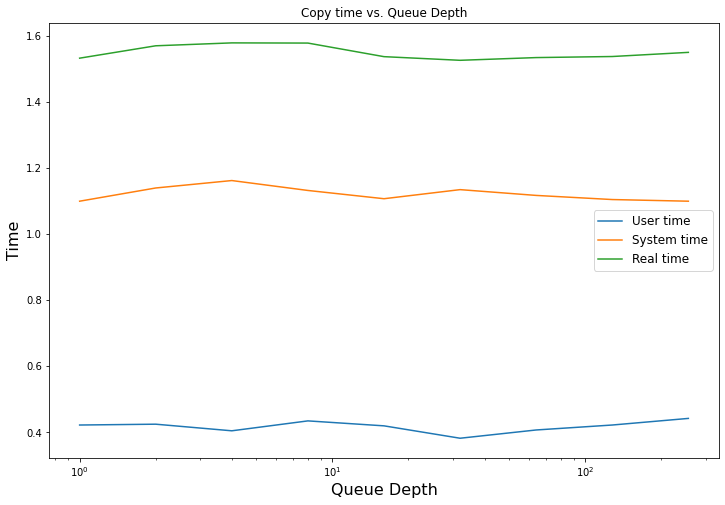

In [127]:
from matplotlib.ticker import ScalarFormatter

means = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('qducp_'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values

        new_label = filename[:-4]
        new_label = new_label.replace("qducp_", "")
        qd = int(new_label)
        # Append the statistics to the respective lists
        means.append((qd, mean[0:3]))


#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])

print(means)

# Extract the sorted parameters and means
parameters, means = zip(*means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, [row[0] for row in means], label="User time")
plt.plot(parameters, [row[1] for row in means], label="System time")
plt.plot(parameters, [row[2] for row in means], label="Real time")


plt.xlabel('Queue Depth', fontsize=16)
plt.ylabel('Time', fontsize=16)

plt.xscale('log')
#plt.yscale('log')
plt.title('Copy time vs. Queue Depth')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
#for parameter, mean in zip(parameters, means):
#    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)


plt.legend(fontsize=12)

plt.savefig('../report/cp_qd.png')
plt.show()

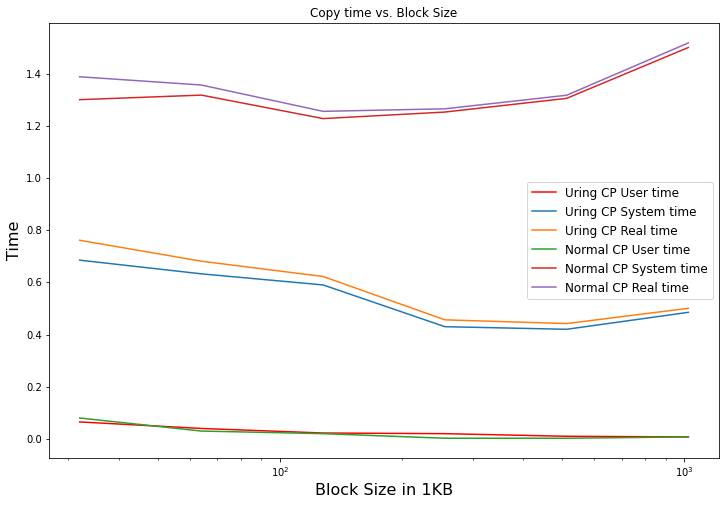

In [134]:
from matplotlib.ticker import ScalarFormatter

means = []
cpu_means = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and (filename.startswith('bsucp_') or filename.startswith('bscp_')) :
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values

        new_label = filename[:-4]
        if(filename.startswith("bsucp_")):
            new_label = new_label.replace("bsucp_", "")
            qd = int(new_label)/1024
            # Append the statistics to the respective lists
            means.append((qd, mean[0:3]))
        elif(filename.startswith("bscp_")):
            new_label = new_label.replace("bscp_", "")
            qd = int(new_label)/1024
            cpu_means.append((qd, mean[0:3]))
        else:
            raise ValueError


#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])
cpu_means.sort(key=lambda x: x[0])


# Extract the sorted parameters and means
parameters, means = zip(*means)
parameters, cpu_means = zip(*cpu_means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, [row[0] for row in means], label="Uring CP User time", color='r')
plt.plot(parameters, [row[1] for row in means], label="Uring CP System time", color='r')
plt.plot(parameters, [row[2] for row in means], label="Uring CP Real time", color='r')

plt.plot(parameters, [row[0] for row in cpu_means], label="Normal CP User time", color='b')
plt.plot(parameters, [row[1] for row in cpu_means], label="Normal CP System time", color='b')
plt.plot(parameters, [row[2] for row in cpu_means], label="Normal CP Real time", color='b')

plt.xlabel('Block Size in 1KB', fontsize=16)
plt.ylabel('Time', fontsize=16)

plt.xscale('log')
#plt.yscale('log')
plt.title('Copy time vs. Block Size')

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
#for parameter, mean in zip(parameters, means):
#    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)


plt.legend(fontsize=12)

plt.savefig('../report/cp_bs.png')
plt.show()